# EDA

캐글에서 진행하는 LOAN DATA에 대한 EDA 이다. 

각 컬럼의 데이터 타입, 분포를 확인하겠다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/loan/Loan payments data.csv')

In [3]:
data

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [4]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


위에 표시되지 않은 컬럼들은 수치로 표현될 수 없는 값들이기 때문에 생략되었다.

예측해야하는 것은 loan_status이다.

## 메타데이터

데이터의 의미와 데이터 타입에 대해 정의하겠다.

### loan_id

In [5]:
data.Loan_ID.describe()

count             500
unique            500
top       xqd20160290
freq                1
Name: Loan_ID, dtype: object

Loan_ID는 각기 대출자 식별 ID로 500개 모두 다른 고유한 문자열이다.

### loan_status

In [6]:
data.loan_status.describe()

count         500
unique          3
top       PAIDOFF
freq          300
Name: loan_status, dtype: object

In [7]:
set(data.loan_status)

{'COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF'}

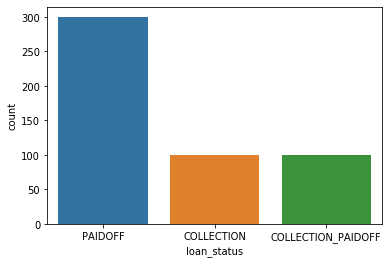

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = data, x = 'loan_status')

PAIDOFF = 제시간 안에 대출 상환

COLLECTION = 아직 상환 X

COLLECTION_PAIDOFF = 늦었지만 상환

위 세가지가 예측해야하는 타겟값이 된다. 다중분류 모델링을 해야한다.

### principal

In [9]:
data.Principal

0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
495    1000
496    1000
497     800
498    1000
499    1000
Name: Principal, Length: 500, dtype: int64

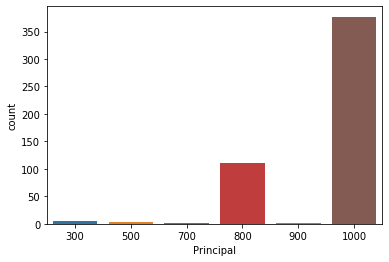

In [10]:
import seaborn as sns

sns.countplot(data = data, x = 'Principal')

초기 대출금이다. 1000이 압도적으로 높은것을 확인 할 수 있다.

### terms

In [11]:
data.terms

0      30
1      30
2      30
3      15
4      30
       ..
495    30
496    15
497    15
498    30
499    30
Name: terms, Length: 500, dtype: int64

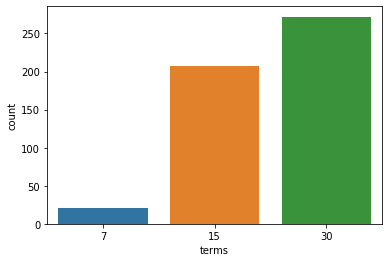

In [12]:
import seaborn as sns

sns.countplot(data = data, x = 'terms')

빚 상환 기간이다. 7, 15, 30일 총 세가지 기간으로 구성되어있다.

### effective date

In [13]:
data.effective_date

0       9/8/2016
1       9/8/2016
2       9/8/2016
3       9/8/2016
4       9/9/2016
         ...    
495    9/12/2016
496    9/12/2016
497    9/12/2016
498    9/12/2016
499    9/12/2016
Name: effective_date, Length: 500, dtype: object

대출일이다. 시작일 정도로 생각하면 될 듯 하다.

### due date

In [14]:
data.due_date

0       10/7/2016
1       10/7/2016
2       10/7/2016
3       9/22/2016
4       10/8/2016
          ...    
495    10/11/2016
496     9/26/2016
497     9/26/2016
498    11/10/2016
499    10/11/2016
Name: due_date, Length: 500, dtype: object

상환일이다. 갚아야했던 기간이라고 생각하자

### paid_off_time

In [15]:
data.paid_off_time

0       9/14/2016 19:31
1        10/7/2016 9:00
2       9/25/2016 16:58
3       9/22/2016 20:00
4       9/23/2016 21:36
             ...       
495    10/14/2016 19:08
496    10/10/2016 20:02
497     9/29/2016 11:49
498    11/11/2016 22:40
499    10/19/2016 11:58
Name: paid_off_time, Length: 500, dtype: object

실제로 갚은날이라고 생각하자. 

due_date 과 paid_off_time의 날짜가 같으면 status가 paid_off인 것을 확인할 수 있다.

### past_due_days

In [16]:
data.past_due_days

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
495     3.0
496    14.0
497     3.0
498     1.0
499     8.0
Name: past_due_days, Length: 500, dtype: float64

상환일로부터 얼마나 지체되었는지 말해주는 지표이다.

NaN값은 상환일 전에 빚을 갚은 사람들이다.

### age

In [17]:
data.age

0      45
1      50
2      33
3      27
4      28
       ..
495    28
496    26
497    30
498    38
499    28
Name: age, Length: 500, dtype: int64

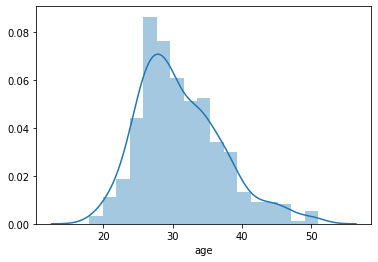

In [18]:
import seaborn as sns

sns.distplot(data.age)

연령분포이다. 20 ~ 30대가 많다는 것을 확인할 수 있다.

### education

In [19]:
data.education

0      High School or Below
1                  Bechalor
2                  Bechalor
3                   college
4                   college
               ...         
495    High School or Below
496    High School or Below
497                 college
498                 college
499    High School or Below
Name: education, Length: 500, dtype: object

In [20]:
set(data.education)

{'Bechalor', 'High School or Below', 'Master or Above', 'college'}

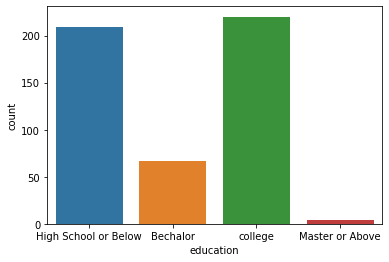

In [21]:
import seaborn as sns

sns.countplot(data.education)

상환자들의 교육 수준을 나타냈다. 

현재 소득수준을 예측할 수 있는 지표가 될수도 있을듯하다.

### gender

In [22]:
data.Gender

0        male
1      female
2      female
3        male
4      female
        ...  
495      male
496      male
497      male
498    female
499      male
Name: Gender, Length: 500, dtype: object

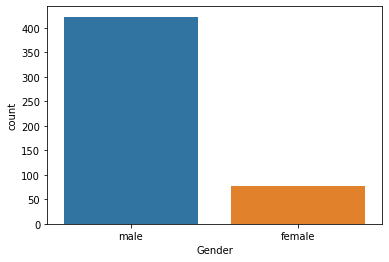

In [23]:
import seaborn as sns

sns.countplot(data.Gender)

남자가 훨씬 많은 것을 알수 있다. 

경우에 따라 다운샘플링이 필요할 듯 하다.

In [24]:
data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

데이터 타입 : 
    
- nominal(명목) : loan_id, gender
    
- ordinal(순서) : loan_status, education
        
- continuous(연속) : principal, terms, past_due_days, age
        
- date(시간) : effective_date, due_date, paid_off_time, 

loan_id는 고객을 식별하기 위한 자료였기 때문에 삭제한다.

effective_date, due_date, paid_off_time에 대한 정보는 past_due_days로 확인가능하다. 

위 4가지 컬럼을 제외하고 분석을 진행하겠다. 

In [26]:
data_1 = data.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis = 1)

# 변수별로 상관관계 확인

### 1. 대출 금액과 상환사이의 상관관계 확인

대출한 금액과 상환 사이의 관계를 확인해보겠다.

In [ ]:
set(data.Principal)

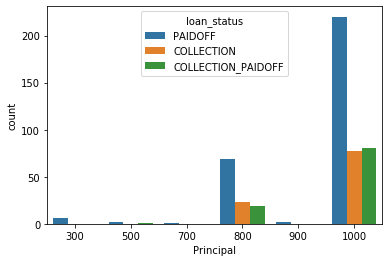

In [36]:
sns.countplot(data= data,x = 'Principal', hue = 'loan_status')